In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
# ----------------------------
# Generate synthetic dataset
# ----------------------------
X, _ = make_blobs(n_samples=300, centers=[[0,0], [5,5]], cluster_std=0.8, random_state=42)
X = np.concatenate([X, np.random.uniform(low=-6, high=10, size=(20, 2))], axis=0)

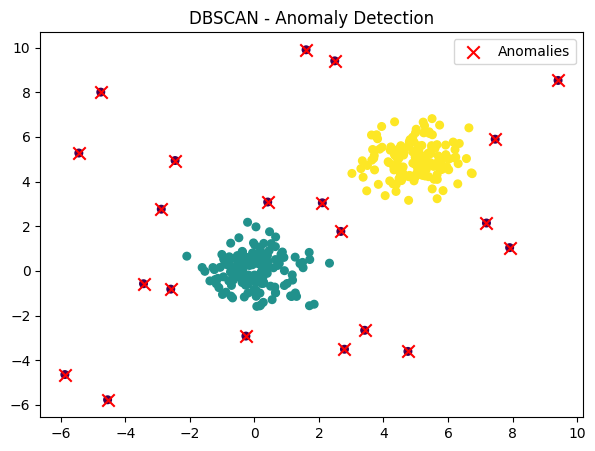

In [15]:
# ----------------------------
# DBSCAN for anomaly detection
# ----------------------------
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
# In DBSCAN, -1 label means anomaly
anomalies_dbscan = X[dbscan_labels == -1]
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=dbscan_labels, cmap='viridis', s=30)
plt.scatter(anomalies_dbscan[:,0], anomalies_dbscan[:,1], c='red', marker='x', s=80, label='Anomalies')
plt.title("DBSCAN - Anomaly Detection")
plt.legend()
plt.show()

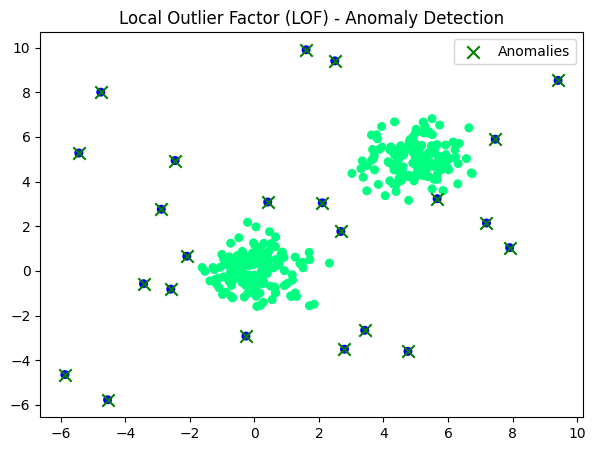

In [22]:
# ----------------------------
# Local Outlier Factor (LOF)
# ----------------------------
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.07) # 20 nearest neighbours
lof_labels = lof.fit_predict(X)
# In LOF, -1 label means anomaly
anomalies_lof = X[lof_labels == -1]
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=lof_labels, cmap='winter', s=30)
plt.scatter(anomalies_lof[:,0], anomalies_lof[:,1], c='green', marker='x', s=80, label='Anomalies')
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.legend()
plt.show()